
# Table of Contents

# Business Understanding
> This is an analysis of the Breast Cancer Wisconsin (Diagnostic) DataSet, obtained from Kaggle We are going to analyze it keeping in mind the following Questions.
    
   * How many Females are affeced by Breast Cancer?
   * How many surgeries done per year? 
   * What is the Death Ratio from Breast Cancer?
   
# Data Understanding

   * Access and Explore
   
# Prepare Data

   * Clean
   
# Evaluation

* Numerical Features
* Categorical Features
* Target vs Features

## How many Females are affeced by Breast Cancer?
   * 317 Females are affected by Breast Cancer in our Dataset.
   * Visualise
   * Brief explanation for visualisation
   
## How many surgeries done per year? 
   * Total surgries done in 2018 are 147, 2019 are 113, 2017 are 57.
   * Visualise
   * Brief explanation for visualisation
   
## How many person died from Breast Cancer?
   * Alive: 252, Dead : 65
   * Visualise
   * Brief explanation for visualisation

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# **Preparing Data**

In [2]:
# import data / preview
df = pd.read_csv('BRCA.csv')
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [3]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [4]:
# remove rows with missing Patient_Status
df = df.dropna(subset=['Patient_Status'], axis=0)

# Data Understanding

In [5]:
# gender
df.Gender.value_counts()

FEMALE    317
MALE        4
Name: Gender, dtype: int64

In [6]:
# use only FEMALE individuals
df = df[df.Gender=='FEMALE']

In [7]:
# convert dates
df.Date_of_Surgery = pd.to_datetime(df.Date_of_Surgery)
df.Date_of_Last_Visit = pd.to_datetime(df.Date_of_Last_Visit)

In [8]:
df.Date_of_Surgery.describe(datetime_is_numeric=True)

count                              317
mean     2018-09-05 04:41:38.422712832
min                2017-01-15 00:00:00
25%                2018-03-11 00:00:00
50%                2018-10-03 00:00:00
75%                2019-03-26 00:00:00
max                2019-11-21 00:00:00
Name: Date_of_Surgery, dtype: object

In [9]:
df.Date_of_Last_Visit.describe(datetime_is_numeric=True)

count                              313
mean     2019-11-22 15:33:55.782747648
min                2017-04-05 00:00:00
25%                2019-01-25 00:00:00
50%                2019-12-23 00:00:00
75%                2020-08-27 00:00:00
max                2026-09-24 00:00:00
Name: Date_of_Last_Visit, dtype: object

In [10]:
df['Surgery_Year'] = df.Date_of_Surgery.dt.year
df.Surgery_Year.value_counts()

2018    147
2019    113
2017     57
Name: Surgery_Year, dtype: int64

In [11]:
df['LastVisit_Year'] = df.Date_of_Last_Visit.dt.year
df.LastVisit_Year.value_counts()

2020.0    109
2019.0     84
2018.0     64
2021.0     36
2017.0     11
2022.0      5
2026.0      2
2024.0      1
2023.0      1
Name: LastVisit_Year, dtype: int64

In [12]:
df.LastVisit_Year.value_counts()

2020.0    109
2019.0     84
2018.0     64
2021.0     36
2017.0     11
2022.0      5
2026.0      2
2024.0      1
2023.0      1
Name: LastVisit_Year, dtype: int64

<a id='1'></a>
# Target

Alive    252
Dead      65
Name: Patient_Status, dtype: int64


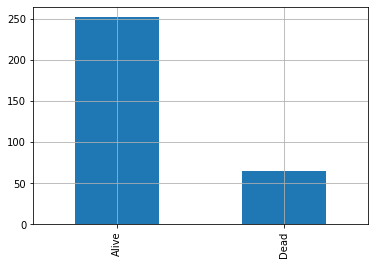

In [13]:
# basic stats
target = 'Patient_Status'
print(df[target].value_counts())
df[target].value_counts().plot(kind='bar')
plt.grid()
plt.show()

<a id='2'></a>
# Numerical Features

In [14]:
features_num = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
                'Surgery_Year']

In [15]:
# basic stats
df[features_num].describe()

,Age,Protein1,Protein2,Protein3,Protein4,Surgery_Year
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.839117,-0.036148,0.954586,-0.092132,0.009829,2018.176656
std,12.889599,0.539693,0.913551,0.590916,0.625618,0.711807
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500,2017.000000
25%,49.000000,-0.361770,0.359950,-0.531360,-0.382240,2018.000000
50%,58.000000,0.003977,1.000300,-0.177200,0.040511,2018.000000
75%,68.000000,0.331860,1.633200,0.281490,0.436250,2019.000000
max,90.000000,1.593600,3.402200,2.193400,1.629900,2019.000000


# Evaluation

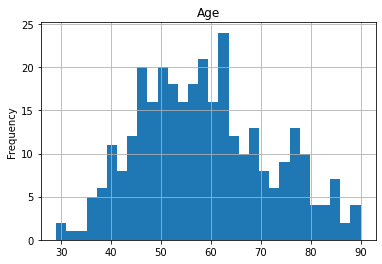

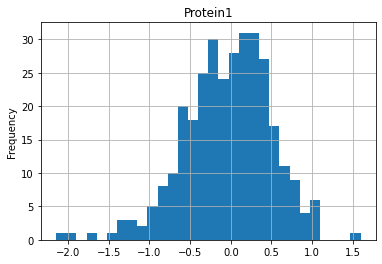

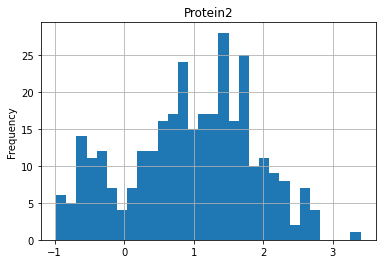

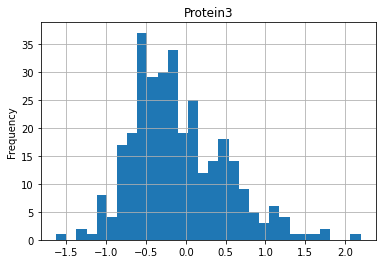

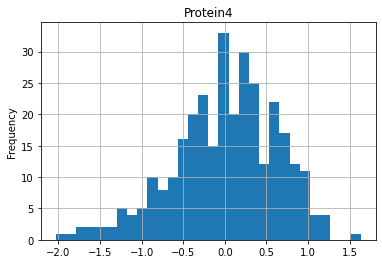

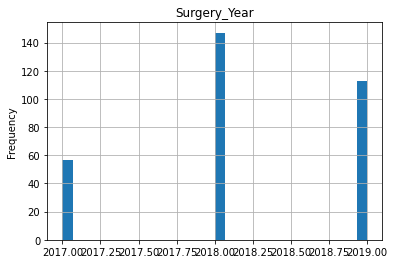

In [16]:
# plot distribution of numerical features
for f in features_num:
    df[f].plot(kind='hist', bins=30)
    plt.title(f)
    plt.grid()
    plt.show()

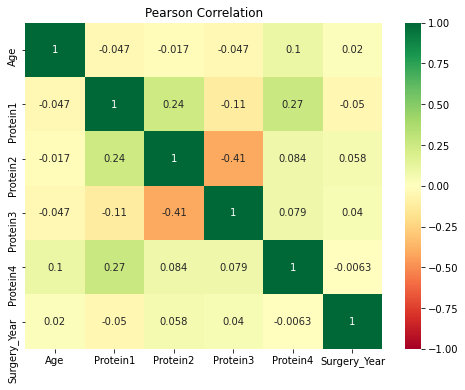

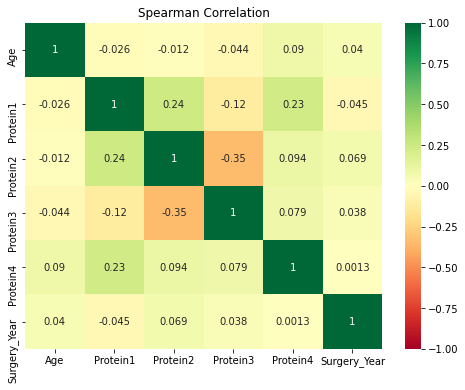

In [17]:
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

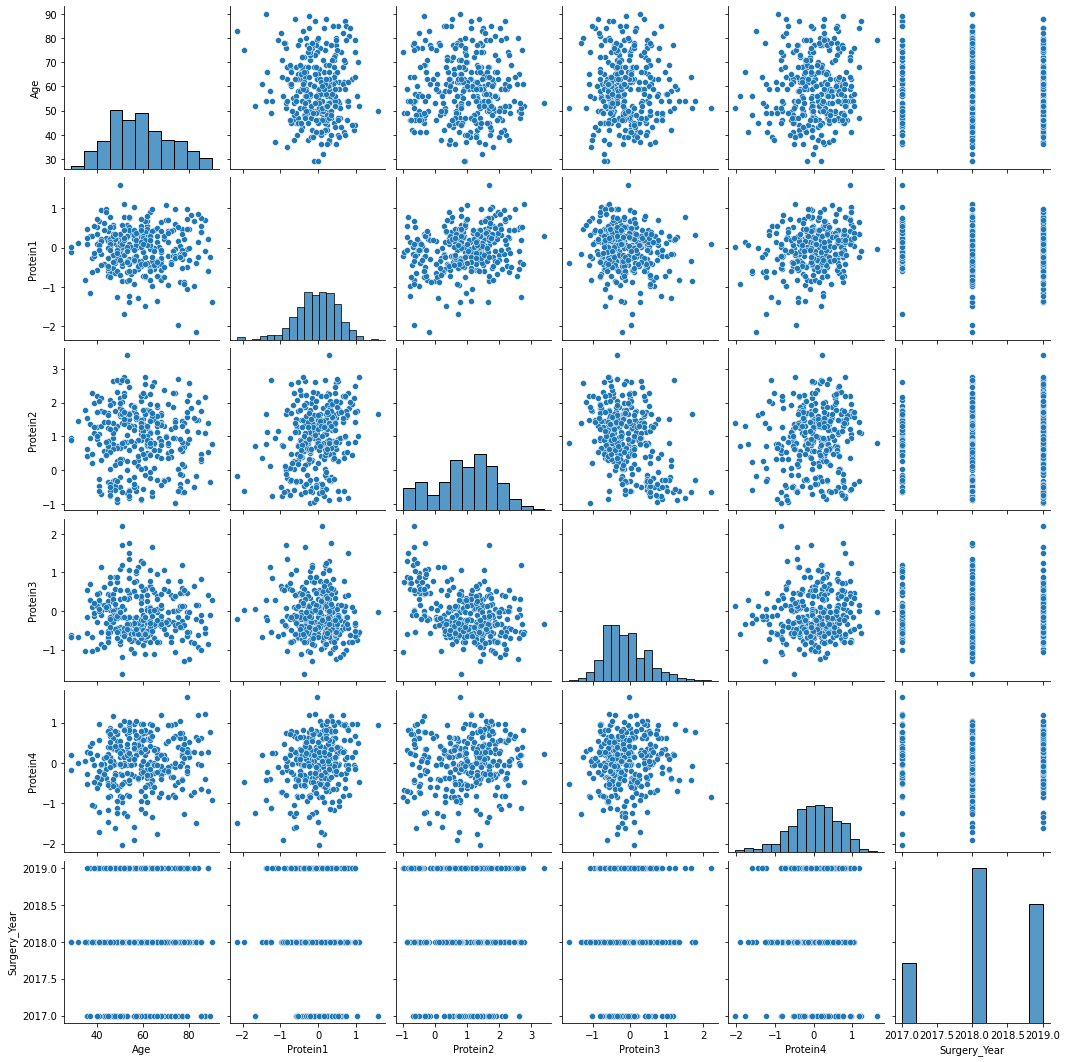

In [18]:
# scatter plots
sns.pairplot(df[features_num])
plt.show()

<a id='3'></a>
# Categorical Features

In [19]:
features_cat = ['Tumour_Stage', 'Histology', 'ER status', 
                'PR status', 'HER2 status', 'Surgery_type']

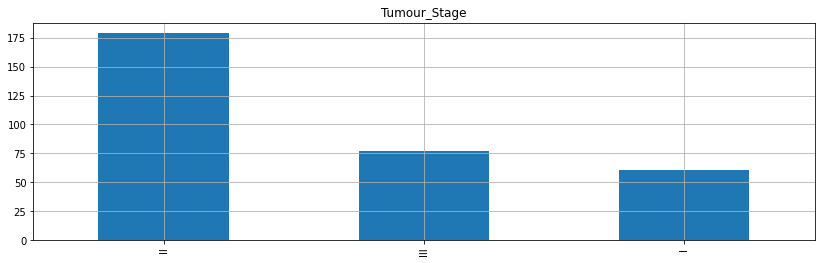

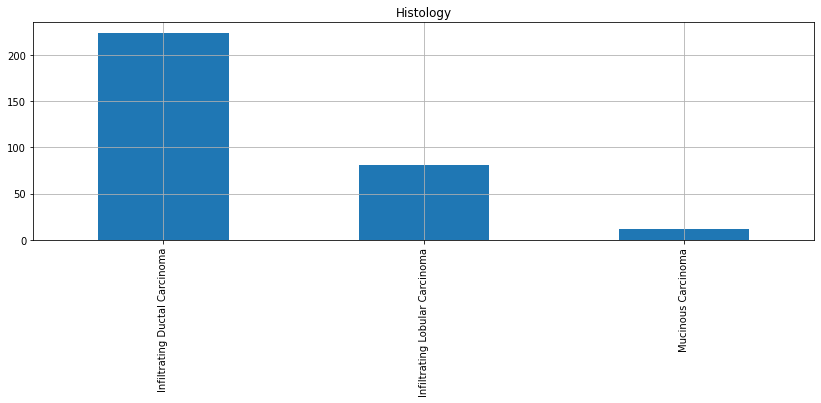

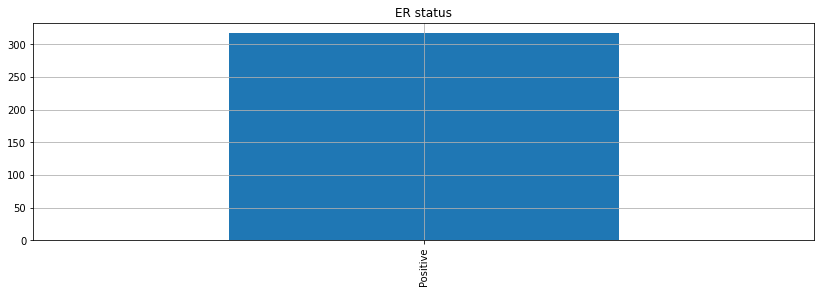

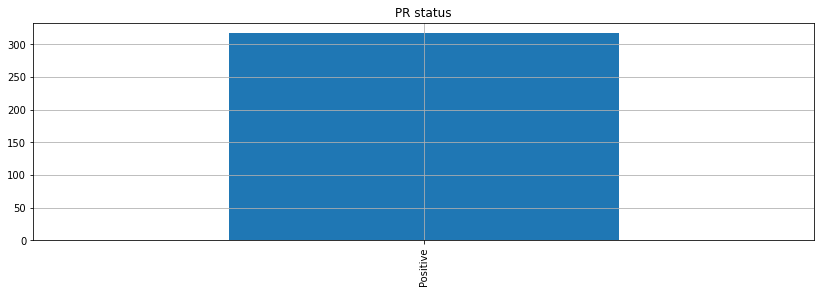

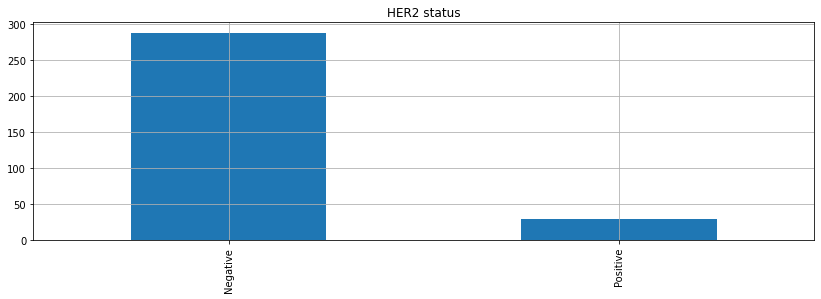

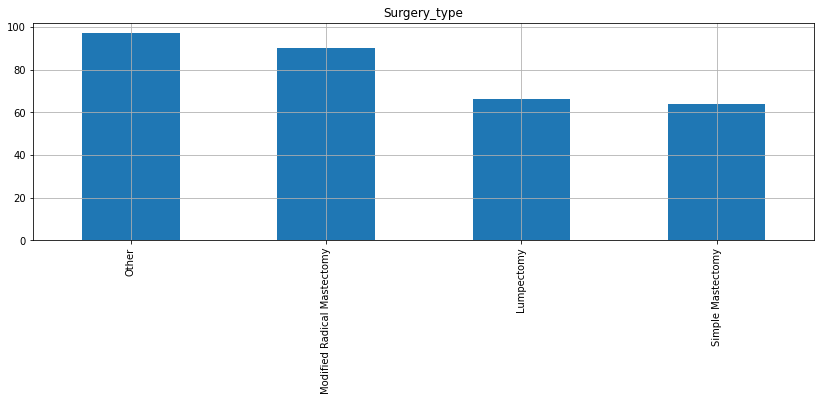

In [20]:
# plot distribution of categorical features
for f in features_cat:
    plt.figure(figsize=(14,4))
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

#### ER status and PR status have only one level => remove these two features.

In [21]:
features_cat = ['Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']

<a id='4'></a>
# Target vs Features

### Numerical Features

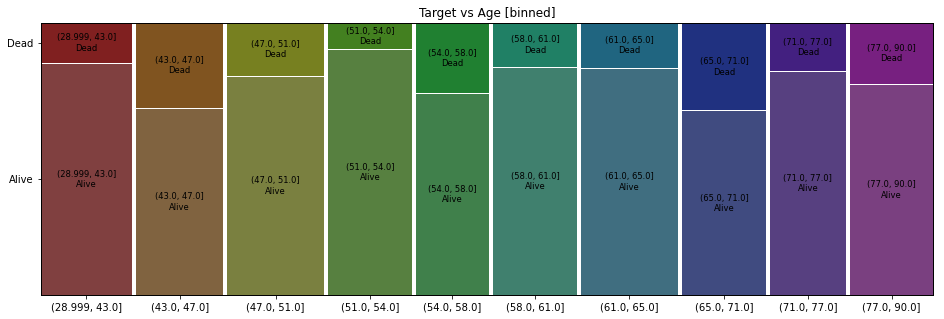

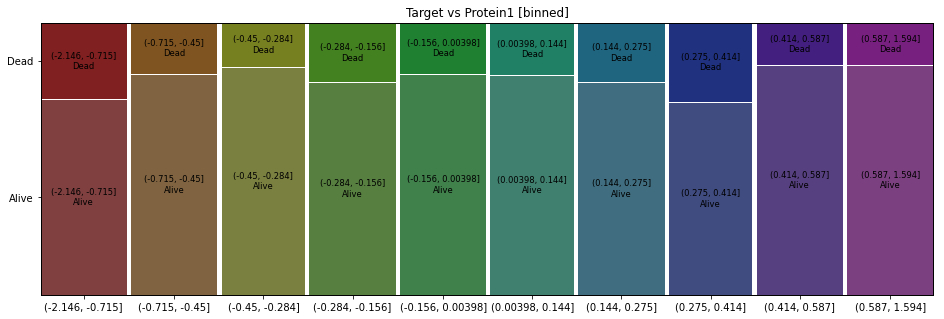

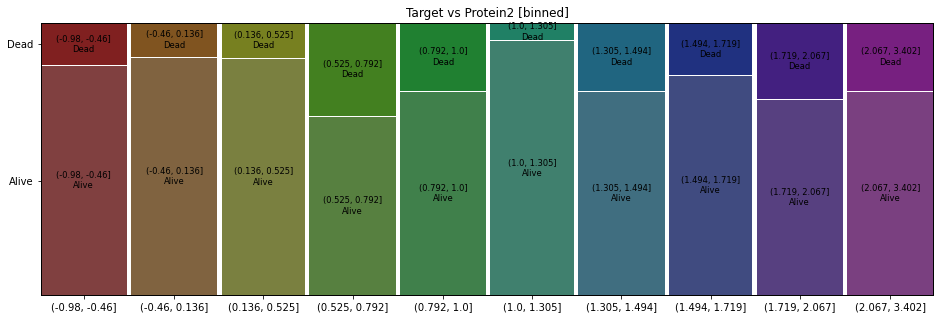

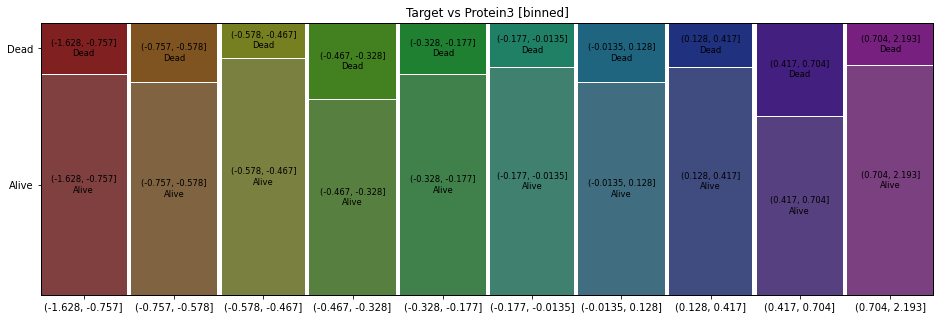

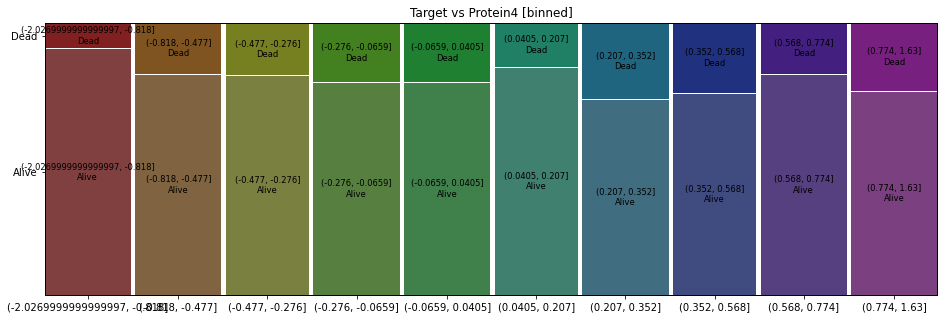

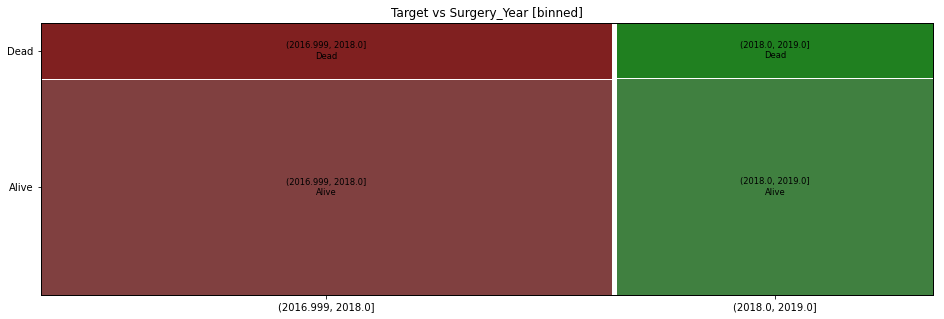

In [22]:
# plot target vs binned numerical features using mosaic plot
plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings

for f in features_num:
    
    # add binned version of each numerical feature first
    new_var = f + '_bin'
    df[new_var] = pd.qcut(df[f], 10, duplicates='drop')
    
    # then create mosaic plot
    plt.rcParams['figure.figsize'] = (16,5) # increase plot size for mosaics
    mosaic(df, [new_var, target], title='Target vs ' + f + ' [binned]')
    plt.show()
    
# reset plot size again
plt.rcParams['figure.figsize'] = plt_para_save

### Categorical Features

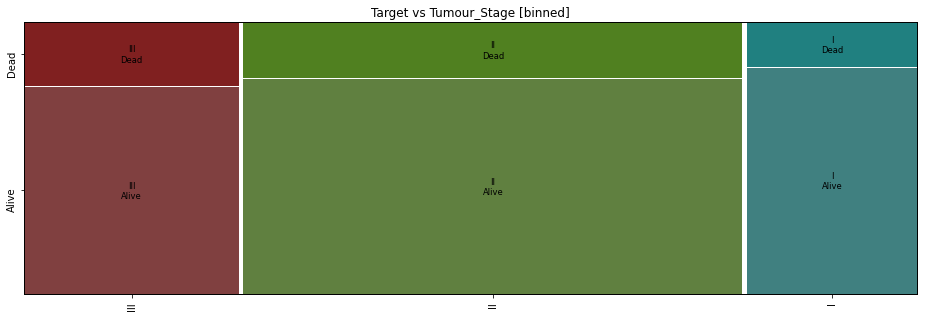

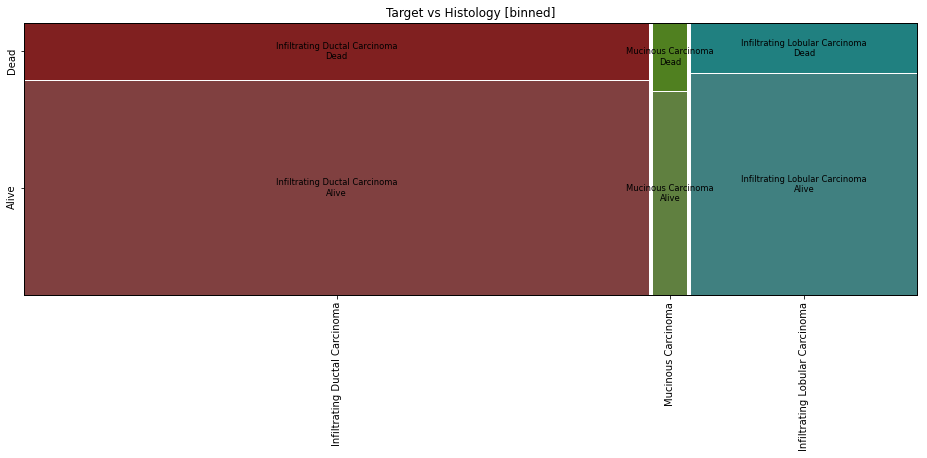

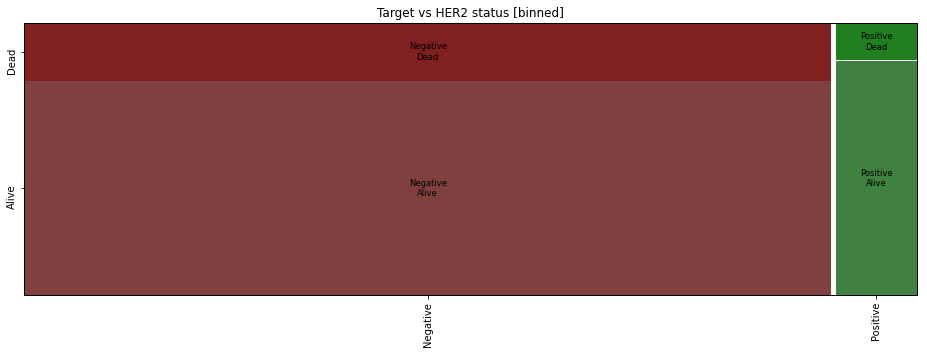

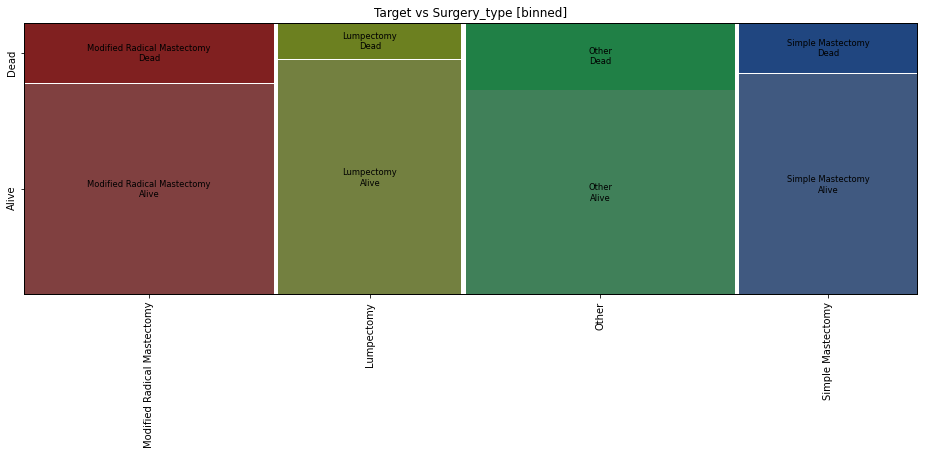

In [23]:
# plot target vs features using mosaic plot
plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings

for f in features_cat:
    plt.rcParams['figure.figsize'] = (16,5) # increase plot size for mosaics
    mosaic(df, [f, target], title='Target vs ' + f + ' [binned]',
           label_rotation=90)
    plt.show()
    
# reset plot size again
plt.rcParams['figure.figsize'] = plt_para_save